In [3]:
# Importing necessary packages
import pandas as pd # python's data handling package
import numpy as np # python's scientific computing package
import matplotlib.pyplot as plt # python's plotting package
import openpyxl
from sklearn.metrics import mean_squared_error as mse

##### Loading data.

In [4]:
# Both features and target have already been scaled: mean = 0; SD = 1
data = pd.read_csv('Houseprice_data_scaled.csv') 

In [5]:
# First 1800 data items are training set; the next 600 are the validation set
train = data.iloc[:1800] 
val = data.iloc[1800:2400]

In [6]:
# Creating the "X" and "y" variables. We drop sale price from "X"
X_train, X_val = train.drop('Sale Price', axis=1), val.drop('Sale Price', axis=1)
y_train, y_val = train[['Sale Price']], val[['Sale Price']] 

###### Linear Regression

In [7]:
# Importing models
from sklearn.linear_model import LinearRegression

In [8]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [9]:
# Create dataFrame with corresponding feature and its respective coefficients
coeffs = pd.DataFrame(
    [
        ['intercept'] + list(X_train.columns),
        list(lr.intercept_) + list(lr.coef_[0])
    ]
).transpose().set_index(0)
coeffs

,1
0,
intercept,-0.0
LotArea,0.079
OverallQual,0.214395
OverallCond,0.096479
YearBuilt,0.160799
YearRemodAdd,0.025352
BsmtFinSF1,0.091466
BsmtUnfSF,-0.03308
TotalBsmtSF,0.138199


###### Ridge Regression

In [10]:
# Importing Ridge
from sklearn.linear_model import Ridge

In [11]:
# The alpha used by Python's ridge should be the lambda in Hull's book times the number of observations
alphas=[0.01*1800, 0.02*1800, 0.03*1800, 0.04*1800, 0.05*1800, 0.075*1800,0.1*1800,0.2*1800, 0.4*1800]
mses=[]
for alpha in alphas:
    ridge=Ridge(alpha=alpha)
    ridge.fit(X_train,y_train)
    pred=ridge.predict(X_val)
    mses.append(mse(y_val,pred))
    print(mse(y_val,pred))

0.11703284346091346
0.11710797319752998
0.11723952924901117
0.11741457158889525
0.11762384068711455
0.11825709631198021
0.11900057469147929
0.1225464999629295
0.13073599680747125


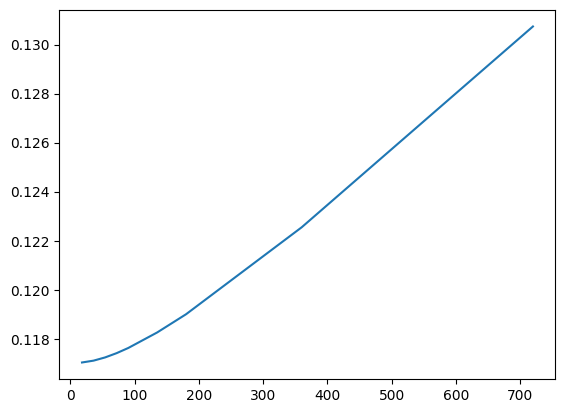

In [12]:
plt.plot(alphas, mses)

###### Lasso

In [13]:
# Import Lasso
from sklearn.linear_model import Lasso

In [14]:
# Here we produce results for alpha=0.05 which corresponds to lambda=0.1 in Hull's book
lasso = Lasso(alpha=0.05)
lasso.fit(X_train, y_train)

Lasso(alpha=0.05)

In [15]:
# DataFrame with corresponding feature and its respective coefficients
coeffs = pd.DataFrame(
    [
        ['intercept'] + list(X_train.columns),
        list(lasso.intercept_) + list(lasso.coef_)
    ]
).transpose().set_index(0)
coeffs

,1
0,
intercept,-0.0
LotArea,0.044304
OverallQual,0.298079
OverallCond,0.0
YearBuilt,0.052091
YearRemodAdd,0.064471
BsmtFinSF1,0.115875
BsmtUnfSF,-0.0
TotalBsmtSF,0.10312


###### Lasso with different levels of alpha and its mse

In [16]:
# We now consider different lambda values. The alphas are half the lambdas
alphas=[0.01/2, 0.02/2, 0.03/2, 0.04/2, 0.05/2, 0.075/2, 0.1/2]
mses=[]
for alpha in alphas:
    lasso=Lasso(alpha=alpha)
    lasso.fit(X_train,y_train)
    pred=lasso.predict(X_val)
    mses.append(mse(y_val,pred))
    print(mse(y_val, pred))

0.11654751909608793
0.11682687945311097
0.11803348353132033
0.12012836764958999
0.12301536903084047
0.13178576395045638
0.1401719458448378


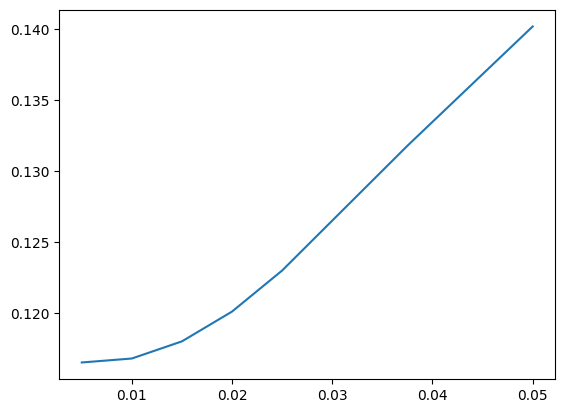

In [17]:
plt.plot(alphas, mses)

### Part A - Dealing with Missing Observations

#### **Mean** as a method of removing missing data

In [28]:
original_data = pd.read_excel('Original_Data.xlsx', engine='openpyxl', header=3) 
original_data = original_data.iloc[:,:-2]
print(original_data.head())

print(original_data['LotFrontage'].describe())
print(original_data.isnull().sum())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [34]:
from sklearn.impute import SimpleImputer, KNNImputer

train_data = original_data.iloc[:1800].copy(deep=True)
validation_data = original_data.iloc[1800:2400].copy(deep=True)
test_data = original_data.iloc[2400:].copy(deep=True)

features = ['LotFrontage', 'OverallQual', 'YearBuilt', 'LotArea']
target = 'SalePrice'

mean_imputer = SimpleImputer(strategy='mean')
train_data['LotFrontage'] = mean_imputer.fit_transform(train_data[['LotFrontage']])
validation_data['LotFrontage'] = mean_imputer.transform(validation_data[['LotFrontage']])
test_data['LotFrontage'] = mean_imputer.transform(test_data[['LotFrontage']])

In [50]:
lr = LinearRegression()
lr.fit(train_data[features], train_data[target])
lr.coef_

array([5.44186746e+02, 3.78464103e+04, 3.51888069e+02, 1.39595332e+00])

In [45]:
from sklearn.model_selection import GridSearchCV

def tune_alpha(train_data, features, target):
    # Define the parameter grid
    param_grid = {'alpha': [0.001, 0.015, 0.1, 1, 10, 100]}
    
    # Define the models
    lasso = Lasso()
    ridge = Ridge()

    # Setup grid searches
    grid_search_lasso = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search_ridge = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')

    # Perform grid search for Lasso
    grid_search_lasso.fit(train_data[features], train_data[target])
    lasso_best_alpha = grid_search_lasso.best_params_['alpha']

    # Perform grid search for Ridge
    grid_search_ridge.fit(train_data[features], train_data[target])
    ridge_best_alpha = grid_search_ridge.best_params_['alpha']

    return lasso_best_alpha, ridge_best_alpha

# Assuming 'train_data' is the training set after imputation
lasso_alpha, ridge_alpha = tune_alpha(train_data, features, target)
print(f"Optimal Lasso alpha: {lasso_alpha}")
print(f"Optimal Ridge alpha: {ridge_alpha}")

Optimal Lasso alpha: 0.001
Optimal Ridge alpha: 0.001


In [58]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate_models(features, target, train_data, validation_data):
    results = {}
    strategies = ['mean', 'median', 'most_frequent']  # Imputation strategies
    models = {
        'Linear': LinearRegression(),
        'Lasso': Lasso(alpha=0.001),  # Placeholder, should be tuned
        'Ridge': Ridge(alpha=0.001)   # Placeholder, should be tuned
    }

    # Apply each imputation strategy
    for strategy in strategies:
        imputer = SimpleImputer(strategy=strategy)
        train_data_imputed = train_data.copy()
        validation_data_imputed = validation_data.copy()
        train_data_imputed['LotFrontage'] = imputer.fit_transform(train_data[['LotFrontage']])
        validation_data_imputed['LotFrontage'] = imputer.transform(validation_data[['LotFrontage']])

        # Fitting each model 
        for model_name, model in models.items():
            model.fit(train_data_imputed[features], train_data_imputed[target])
            predictions = model.predict(validation_data_imputed[features])
            mse = mean_squared_error(validation_data_imputed[target], predictions)
            rmse = mse ** 0.5  # Corrected RMSE calculation
            mae = mean_absolute_error(validation_data_imputed[target], predictions)
            r2 = r2_score(validation_data_imputed[target], predictions)

            # Storing results
            results[f'{strategy}_{model_name}'] = {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R2': r2}

    return results

In [57]:
evaluation_results = evaluate_models(features, target, train_data, validation_data)

# Display the results
for key, value in evaluation_results.items():
    print(f"Imputation and Model: {key}")
    print(f"  MSE: {value['MSE']:.2f}")
    print(f"  RMSE: {value['RMSE']:.2f}")
    print(f"  MAE: {value['MAE']:.2f}")
    print(f"  R2: {value['R2']:.2f}")
    print('-----')

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1795  1800          80       RL         80.0     8000   Pave   NaN      Reg   
1796  1801          50       RL         60.0    10800   Pave   NaN      Reg   
1797  1802          50       RL         60.0     8064   Pave   NaN      Reg   
1798  1803          60       RL         76.0     7570   Pave   NaN      Reg   
1799  1804          90       RL         75.0     8604   Pave   NaN      IR1   

     LandContour Utilities  ... PoolArea PoolQC Fen

# <span style='color:Red'> Part C <span/>

## Additional Feature #1: House Style

### Creating Dummies for Types of House Style

In [110]:
HouseStyle_types = []
HouseStyle = {}

for i in original_data['HouseStyle']:
    if i not in HouseStyle_types:
        HouseStyle_types.append(i)
        HouseStyle[i] = []

for i in original_data['HouseStyle']:
    for j in range(len(HouseStyle_types)):
        if i == HouseStyle_types[j]:
            HouseStyle[HouseStyle_types[j]].append(1)
        else:
            HouseStyle[HouseStyle_types[j]].append(0)

HouseStyle = pd.DataFrame.from_dict(HouseStyle)

HouseStyle.head()

,2Story,1Story,1.5Fin,1.5Unf,SFoyer,SLvl,2.5Unf,2.5Fin
0,1,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0


### Standardizing dummies

In [111]:
HouseStyle_standardized = HouseStyle
HouseStyle_standardized = (HouseStyle_standardized - HouseStyle_standardized.mean()) / HouseStyle_standardized.std()
HouseStyle_standardized.head(5)

,2Story,1Story,1.5Fin,1.5Unf,SFoyer,SLvl,2.5Unf,2.5Fin
0,1.534042,-1.008114,-0.347239,-0.081083,-0.171378,-0.21454,-0.091208,-0.052514
1,-0.651648,0.991610,-0.347239,-0.081083,-0.171378,-0.21454,-0.091208,-0.052514
2,1.534042,-1.008114,-0.347239,-0.081083,-0.171378,-0.21454,-0.091208,-0.052514
3,1.534042,-1.008114,-0.347239,-0.081083,-0.171378,-0.21454,-0.091208,-0.052514
4,1.534042,-1.008114,-0.347239,-0.081083,-0.171378,-0.21454,-0.091208,-0.052514


## Additional Feature #2: Exterior 1 Style

### Creating Dummies for Types of House Style

In [122]:
Exterior1st_types = []
Exterior1st = {}

for i in original_data['Exterior1st']:
    if i not in Exterior1st_types:
        Exterior1st_types.append(i)
        Exterior1st[i] = []

for i in original_data['Exterior1st']:
    for j in range(len(Exterior1st_types)):
        if i == Exterior1st_types[j]:
            Exterior1st[Exterior1st_types[j]].append(1)
        else:
            Exterior1st[Exterior1st_types[j]].append(0)

Exterior1st = pd.DataFrame.from_dict(Exterior1st)

Exterior1st.head()

,VinylSd,MetalSd,Wd Sdng,HdBoard,BrkFace,WdShing,CemntBd,Plywood,AsbShng,Stucco,BrkComm,AsphShn,Stone,ImStucc,CBlock,NaN
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Standardizing Dummies

In [125]:
Exterior1st_standardized = Exterior1st
Exterior1st_standardized = (Exterior1st_standardized - Exterior1st_standardized.mean()) / Exterior1st_standardized.std()
Exterior1st_standardized.head(5)

Exterior1st_standardized = Exterior1st_standardized.fillna(0)

Exterior1st_standardized.head()

,VinylSd,MetalSd,Wd Sdng,HdBoard,BrkFace,WdShing,CemntBd,Plywood,AsbShng,Stucco,BrkComm,AsphShn,Stone,ImStucc,CBlock,NaN
0,1.355154,-0.426675,-0.403911,-0.422727,-0.175583,-0.138821,-0.211009,-0.28674,-0.122489,-0.121035,-0.045462,-0.02623,-0.02623,-0.018544,-0.02623,0.0
1,-0.737670,2.342901,-0.403911,-0.422727,-0.175583,-0.138821,-0.211009,-0.28674,-0.122489,-0.121035,-0.045462,-0.02623,-0.02623,-0.018544,-0.02623,0.0
2,1.355154,-0.426675,-0.403911,-0.422727,-0.175583,-0.138821,-0.211009,-0.28674,-0.122489,-0.121035,-0.045462,-0.02623,-0.02623,-0.018544,-0.02623,0.0
3,-0.737670,-0.426675,2.474943,-0.422727,-0.175583,-0.138821,-0.211009,-0.28674,-0.122489,-0.121035,-0.045462,-0.02623,-0.02623,-0.018544,-0.02623,0.0
4,1.355154,-0.426675,-0.403911,-0.422727,-0.175583,-0.138821,-0.211009,-0.28674,-0.122489,-0.121035,-0.045462,-0.02623,-0.02623,-0.018544,-0.02623,0.0


## Adding Additional Features to DataFrame

In [126]:
data_c = pd.concat([data_b, HouseStyle_standardized, Exterior1st_standardized], axis=1)
data_c = data_c[[col for col in data_c.columns if col != 'Sale Price'] + ['Sale Price']]

data_c.head()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,Plywood,AsbShng,Stucco,BrkComm,AsphShn,Stone,ImStucc,CBlock,NaN,Sale Price
0,-0.199572,0.652747,-0.512407,1.038851,0.875754,0.597837,-0.937245,-0.482464,-0.808820,1.203988,...,-0.28674,-0.122489,-0.121035,-0.045462,-0.02623,-0.02623,-0.018544,-0.02623,0.0,0.358489
1,-0.072005,-0.072527,2.189741,0.136810,-0.432225,1.218528,-0.635042,0.490326,0.276358,-0.789421,...,-0.28674,-0.122489,-0.121035,-0.045462,-0.02623,-0.02623,-0.018544,-0.02623,0.0,0.008849
2,0.111026,0.652747,-0.512407,0.972033,0.827310,0.095808,-0.296754,-0.329118,-0.637758,1.231999,...,-0.28674,-0.122489,-0.121035,-0.045462,-0.02623,-0.02623,-0.018544,-0.02623,0.0,0.552733
3,-0.077551,0.652747,-0.512407,-1.901135,-0.722887,-0.520319,-0.057698,-0.722067,-0.528171,0.975236,...,-0.28674,-0.122489,-0.121035,-0.045462,-0.02623,-0.02623,-0.018544,-0.02623,0.0,-0.528560
4,0.444919,1.378022,-0.512407,0.938624,0.730423,0.481458,-0.170461,0.209990,-0.036366,1.668495,...,-0.28674,-0.122489,-0.121035,-0.045462,-0.02623,-0.02623,-0.018544,-0.02623,0.0,0.895898


## Linear regression

In [137]:
train = data_c.iloc[:1800] 
val = data_c.iloc[1800:2400]
test = data_c.iloc[2400:2908]

In [139]:
lr=LinearRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_train)
print(mse(y_train,pred))
pred=lr.predict(X_val)
print(mse(y_val,pred))

0.11152274145191847
0.11324573756285385


In [140]:
# Create dataFrame with corresponding feature and its respective coefficients
coeffs = pd.DataFrame(
    [
        ['intercept'] + list(X_train.columns),
        list(lr.intercept_) + list(lr.coef_[0])
    ]
).transpose().set_index(0)
coeffs

,1
0,
intercept,3.634024
LotArea,0.064625
OverallQual,0.212763
OverallCond,0.097328
YearBuilt,0.164928
YearRemodAdd,0.026266
BsmtFinSF1,0.094148
BsmtUnfSF,-0.031531
TotalBsmtSF,0.140319


## Ridge regression

In [141]:
from sklearn.linear_model import Ridge

In [142]:
# The alpha used by Python's ridge should be the lambda in Hull's book times the number of observations
alphas=[0.01*1800, 0.02*1800, 0.03*1800, 0.04*1800, 0.05*1800, 0.075*1800,0.1*1800,0.2*1800, 0.6*1800, 1.0*1800]
mses=[]
for alpha in alphas:
    ridge=Ridge(alpha=alpha)
    ridge.fit(X_train,y_train)
    pred=ridge.predict(X_val)
    mses.append(mse(y_val,pred))
    print(mse(y_val,pred))

0.11326531579822387
0.11336252747911464
0.1135131962680416
0.1137046478226681
0.11392795069188234
0.11458790950772202
0.11534921074236754
0.11892129914894461
0.1358008307047759
0.15391310093063557


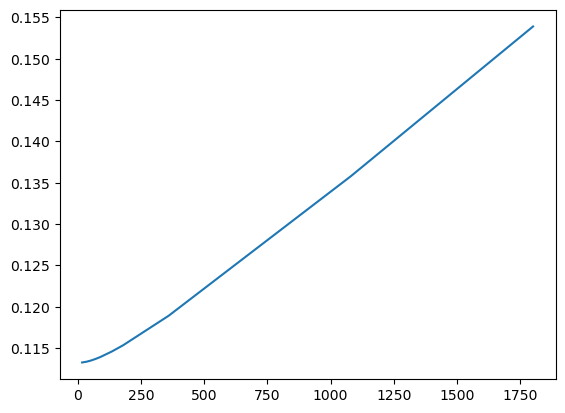

In [143]:
plt.plot(alphas, mses)

## Lasso regression

In [145]:
from sklearn.linear_model import Lasso

In [148]:
# Here we produce results for alpha=0.05 which corresponds to lambda=0.1 in Hull's book
lasso = Lasso(alpha=0.05)
lasso.fit(X_train, y_train)

# DataFrame with corresponding feature and its respective coefficients
coeffs = pd.DataFrame(
    [
        ['intercept'] + list(X_train.columns),
        list(lasso.intercept_) + list(lasso.coef_)
    ]
).transpose().set_index(0)
coeffs

,1
0,
intercept,-0.000182
LotArea,0.041762
OverallQual,0.29864
OverallCond,0.0
YearBuilt,0.052163
YearRemodAdd,0.065166
BsmtFinSF1,0.116103
BsmtUnfSF,-0.0
TotalBsmtSF,0.103082


### Lasso with different levels of alpha and its mse

In [151]:
# We now consider different lambda values. The alphas are half the lambdas
alphas=[0.01/2, 0.02/2, 0.03/2, 0.04/2, 0.05/2, 0.075/2, 0.1/2]
mses=[]
for alpha in alphas:
    lasso=Lasso(alpha=alpha)
    lasso.fit(X_train,y_train)
    pred=lasso.predict(X_val)
    mses.append(mse(y_val,pred))
    print(mse(y_val, pred))

0.11257412527890504
0.11267114936873635
0.11401714221381037
0.11640388443011683
0.11966676076982602
0.1297652680039838
0.13874095621169108


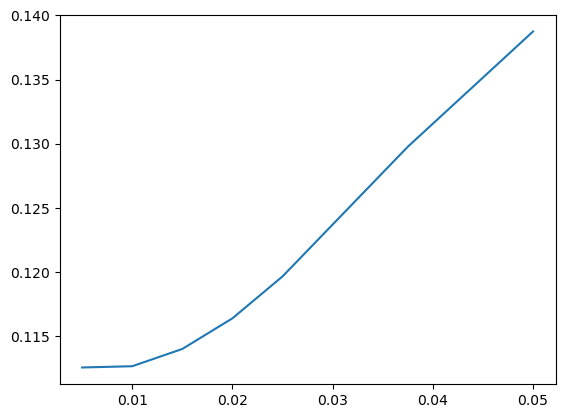

In [153]:
plt.plot(alphas, mses)

In [155]:
# Calculate mse for test set when Hull's lambda =0.04
alpha=0.04/2
lasso=Lasso(alpha=alpha)
lasso.fit(X_train,y_train)
pred=lasso.predict(X_test)
print(mse(y_test,pred))

0.12512527111795194


In [156]:
# Calculate mse for test set when Hull's lambda =0.1
alpha=0.1/2
lasso=Lasso(alpha=alpha)
lasso.fit(X_train,y_train)
pred=lasso.predict(X_test)
print(mse(y_test,pred))

0.14673911836077924
